In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

# analisis data penjualan kenapa minus

In [3]:
##membaca data dari excel dengan pandas
data=pd.read_excel("Online Retail.xlsx")

In [4]:
## membaca 5 data teratas
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
## membaca 5 data terbawah
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# *Product Analytics*

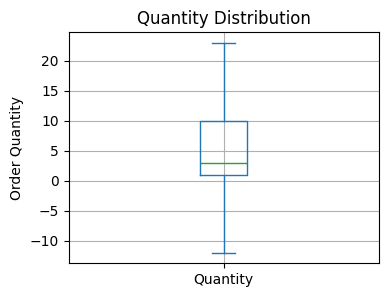

In [6]:
## membuat box plot
ax = data['Quantity'].plot.box(
    showfliers = False,
    grid = True,
    figsize = (4, 3)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

In [7]:
## melihat jumlah penjualan keseluruhan
pd.DataFrame(data['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [8]:
## melihat jumlah penjualan yang lebih dari 0, artinya tidak minus/tidak terjadi refund
data.loc[data['Quantity'] > 0].shape

(531285, 8)

In [9]:
data.shape

(541909, 8)

In [10]:
## mereplace data hanya menggunakan data penjualan yang lebih dari 0
data = data.loc[data['Quantity'] > 0]

# *Time-series number of orders*

In [11]:
monthly_orders_df = data.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df = pd.DataFrame(monthly_orders_df)
monthly_orders_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\2790915589.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = data.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


,InvoiceNo
InvoiceDate,
2010-12-31,1629
2011-01-31,1120
2011-02-28,1126
2011-03-31,1531
2011-04-30,1318
2011-05-31,1731
2011-06-30,1576
2011-07-31,1540
2011-08-31,1409


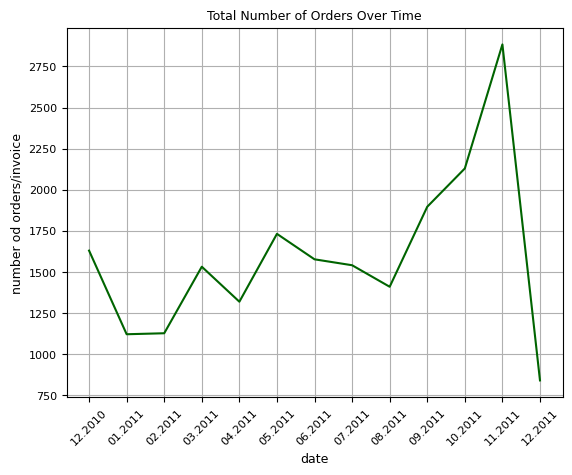

In [12]:
## membuat visualisasi grafik dari jumlah penjualan bulanan
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid = True,
    color = 'darkgreen',
    legend = False
)

ax.set_xlabel('date', fontsize=9)
ax.set_ylabel('number od orders/invoice', fontsize=9)
ax.set_title('Total Number of Orders Over Time', fontsize=9)

plt.yticks(fontsize=8)

plt.xticks(
    fontsize=8,
    ticks=range(len(monthly_orders_df.index)),
    labels=[x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

In [13]:
invoice_dates =data.loc[
  data['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]


In [14]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [15]:
data.loc[data['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

In [16]:
data.shape

(531285, 8)

In [17]:
data = data.loc[data['InvoiceDate'] < '2011-12-01']

In [18]:
monthly_orders_df = data.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\4212329200.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = data.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()


InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: ME, Name: InvoiceNo, dtype: int64

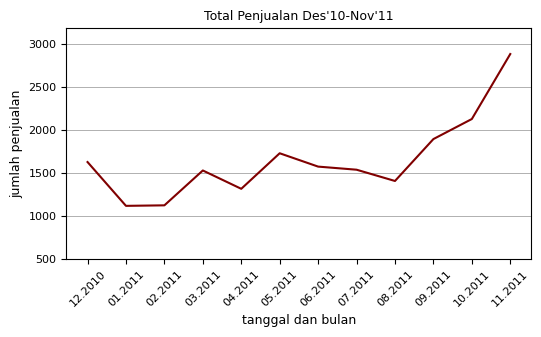

In [19]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    color='maroon',
    figsize = (6, 3),
    legend = False
)

ax.set_xlabel('tanggal dan bulan', fontsize=9)
ax.set_ylabel('jumlah penjualan', fontsize=9)
ax.set_title("Total Penjualan Des'10-Nov'11", fontsize=9)

ax.grid(axis="y", linestyle="-", linewidth=0.7)

ax.set_ylim([500, max(monthly_orders_df.values)+300])

plt.yticks(fontsize=8)

plt.xticks(
    fontsize=8,
    ticks=range(len(monthly_orders_df.index)),
    labels=[x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

In [20]:
data['Sales'] = data['Quantity'] * data['UnitPrice']

In [21]:
monthly_revenue_df = data.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\1301059414.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue_df = data.set_index('InvoiceDate')['Sales'].resample('M').sum()


InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: ME, Name: Sales, dtype: float64

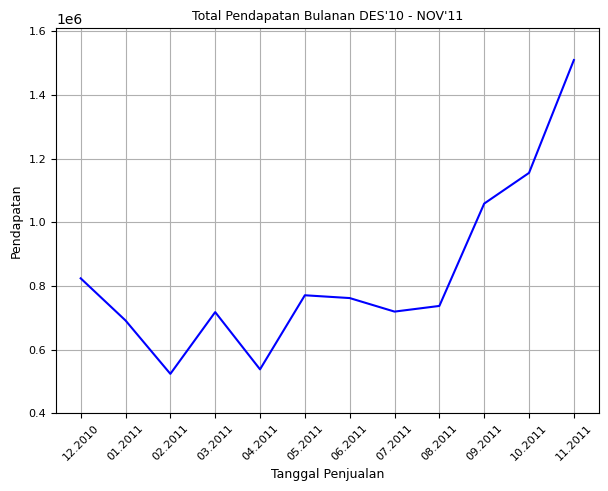

In [22]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid   = True,
    color  = 'blue',
    figsize= (7, 5),
    legend = False
)

ax.set_xlabel('Tanggal Penjualan', fontsize=9)
ax.set_ylabel('Pendapatan', fontsize=9)
ax.set_title("Total Pendapatan Bulanan DES'10 - NOV'11", fontsize=9)

ax.set_ylim([400000, max(monthly_revenue_df)+100000])

plt.yticks(fontsize=8)

plt.xticks(
    fontsize=8,
    ticks=range(len(monthly_revenue_df.index)),
    labels=[x.strftime('%m.%Y') for x in monthly_revenue_df.index],
    rotation=45
)

plt.show()

# *mencari pembeli yang melakukan pembelian ulang*

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
## grouping
invoice_customer_df = data.groupby(
by = ['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

invoice_customer_df.head()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\2925279352.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg({
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\2925279352.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg({


,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [25]:
monthly_repeat_customer_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customer_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\2819261387.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'CustomerID'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\2819261387.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']


InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: ME, Name: CustomerID, dtype: int64

In [26]:
monthly_unique_customers_df = data.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\3658689011.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_unique_customers_df = data.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()


InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: ME, Name: CustomerID, dtype: int64

In [27]:
monthly_repeat_percentage = monthly_repeat_customer_df/monthly_unique_customers_df*100
monthly_repeat_percentage 

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: ME, Name: CustomerID, dtype: float64

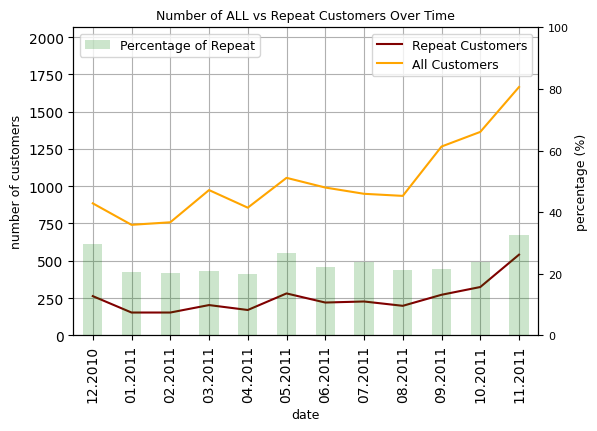

In [28]:
ax = pd.DataFrame(monthly_repeat_customer_df.values).plot(
    figsize=(6,4),
    grid=True,
    color='maroon'
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True,
    color='orange'
)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    figsize=(6, 4),
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date', fontsize=9)
ax.set_ylabel('number of customers', fontsize=9)
ax.set_title('Number of ALL vs Repeat Customers Over Time', fontsize=9)

ax2.set_ylabel('percentage (%)', fontsize=9)

ax.legend(['Repeat Customers', 'All Customers'], fontsize=9)
ax2.legend(['Percentage of Repeat'], fontsize=9, loc='upper left')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+400])
ax2.set_ylim([0, 100])

plt.yticks(fontsize=8)

plt.xticks(
    fontsize=8,
    ticks=range(len(monthly_repeat_customer_df.index)),
    labels=[x.strftime('%m.%Y') for x in monthly_repeat_customer_df.index],
    rotation=45
)

plt.show()

In [29]:
## pendapatan dari customers yang melakukan pembelian ulang
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\3280664892.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(freq='M'), 'CustomerID'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21688\3280664892.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


In [30]:
monthly_rev_perc_repeat_custommers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0

In [31]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: ME, Name: Sales, dtype: float64

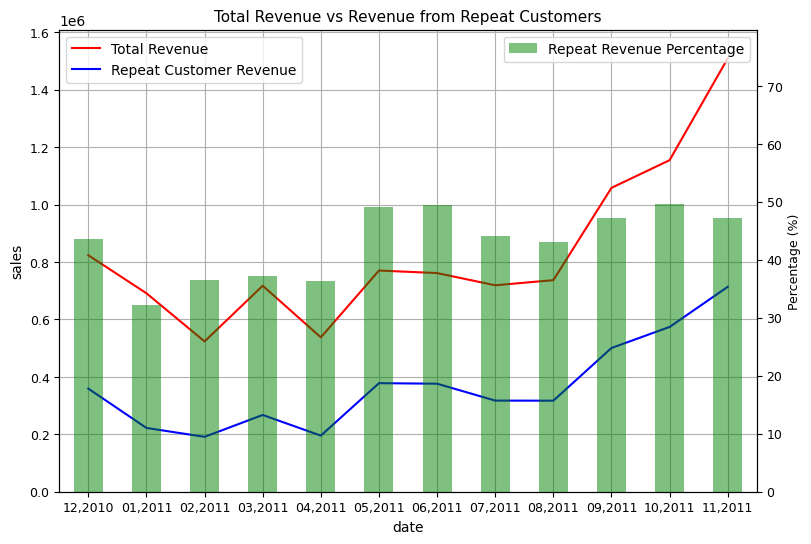

In [98]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    color='red',
    fontsize=6,
    figsize=(9,6))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    fontsize=9,
    color='blue',
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs Revenue from Repeat Customers', fontsize=11)

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_custommers_df.values).plot(
    ax=ax2,
    fontsize=9,
    kind='bar',
    color='green',
    alpha=0.5
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_custommers_df.values)+30])
ax2.set_ylabel('Percentage (%)', fontsize=9)
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m,%Y') for x in monthly_rev_perc_repeat_custommers_df.index
])

plt.show()

## *mencari item yang popular*

In [127]:
## sekarang kita melihat proudk yang populer dari waktu ke waktu
## pertama melakukan filter terhadap product dari waktu ke waktu
date_item_df = pd.DataFrame(
    data.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='ME'), 'StockCode'
    ]) ['Quantity'].sum()
)

date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [129]:
## selanjutnya ranking setiap product yang popular berdasarkan total penjualan
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,StockCode,Quantity
0,23084,14954
1,84826,12551
2,22197,12460
3,22086,7908
4,85099B,5909
...,...,...
2941,90179B,1
2942,DCGSSGIRL,1
2943,90214V,1
2944,90201C,1


In [131]:
## membuat group 5 top penjualan populer
date_item_df = pd.DataFrame(
    data.loc[
        data['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='ME'), 'StockCode'
    ])['Quantity'].sum()
)

date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [137]:
trending_item_df = date_item_df.reset_index().pivot(index='InvoiceDate', columns='StockCode').fillna(0)

trending_item_df = trending_item_df.reset_index()
trending_item_df = trending_item_df.set_index('InvoiceDate')
trending_item_df.columns = trending_item_df.columns.droplevel(0)

trending_item_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


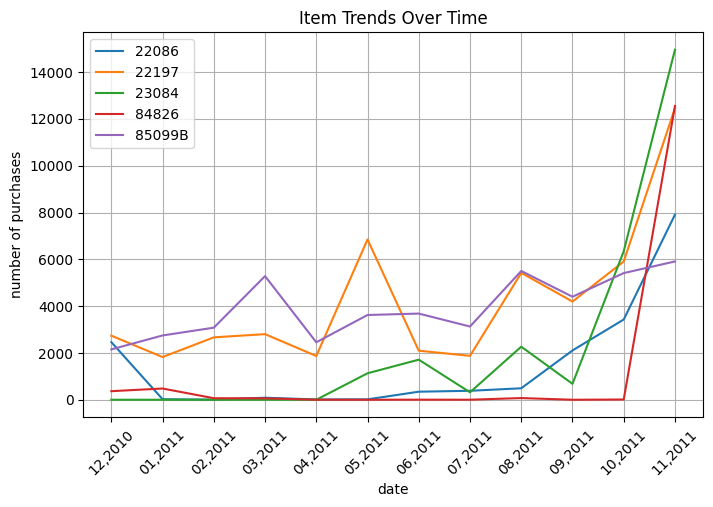

In [142]:
ax = pd.DataFrame(trending_item_df.values).plot(
    figsize=(8, 5),
    grid=True
)

ax.set_xlabel('date')
ax.set_ylabel('number of purchases')
ax.set_title('Item Trends Over Time')

ax.legend(trending_item_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_item_df.index)),
    [x.strftime('%m,%Y') for x in trending_item_df.index],
    rotation=45
)

plt.show()